In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load your dataset
df = pd.read_csv('tested.csv')  # Replace 'data.csv' with your actual file name
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
# Statistical summary
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# Value counts for all categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for Name:
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64

Value counts for Sex:
Sex
male      266
female    152
Name: count, dtype: int64

Value counts for Ticket:
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

Value counts for Cabin:
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
N

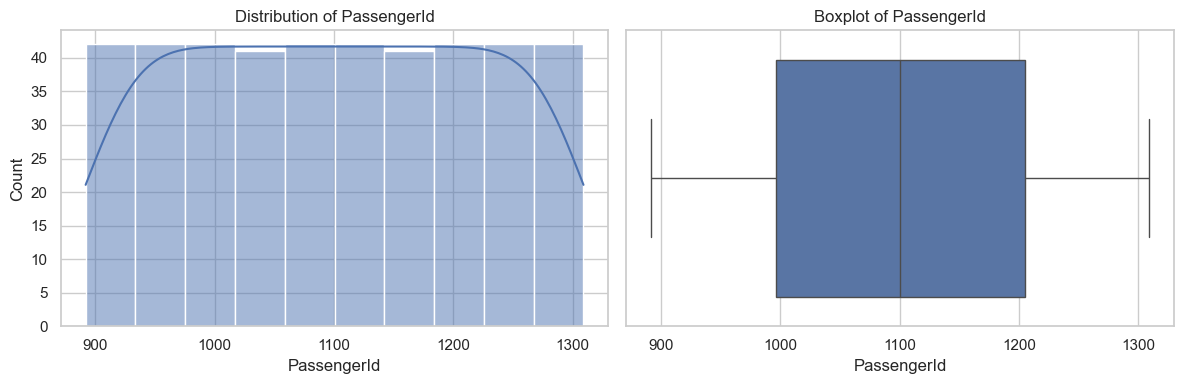

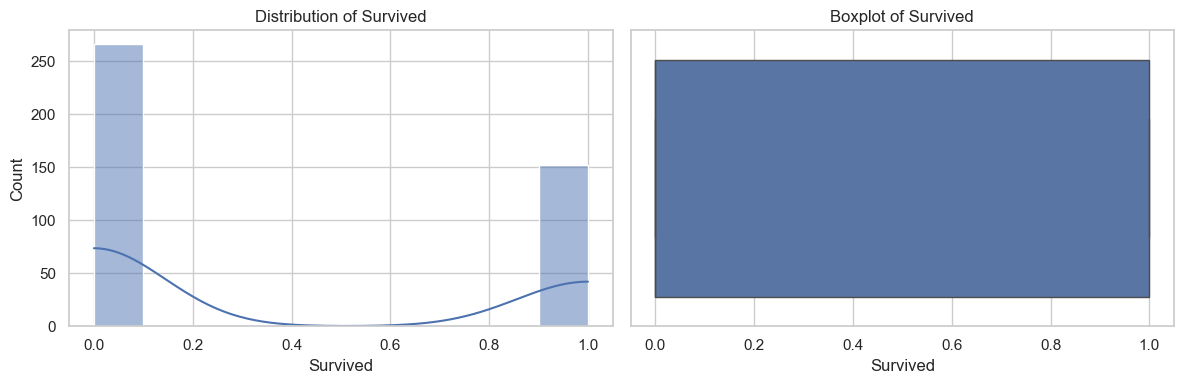

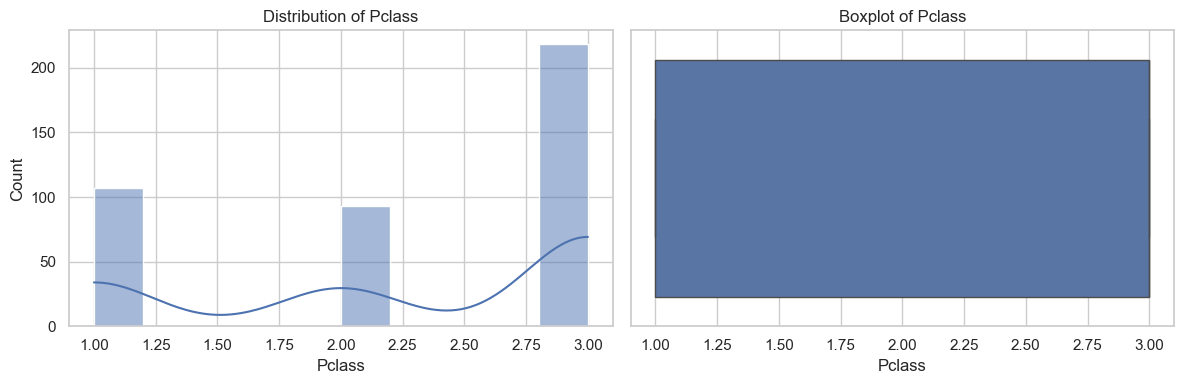

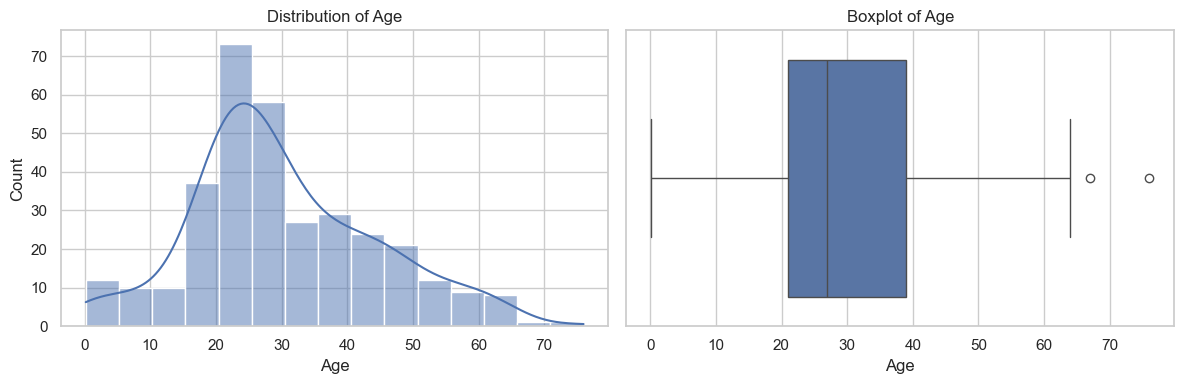

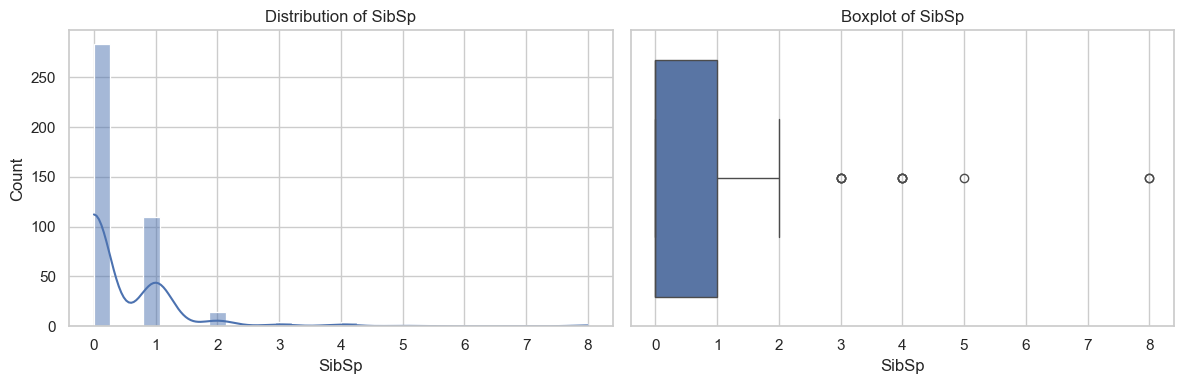

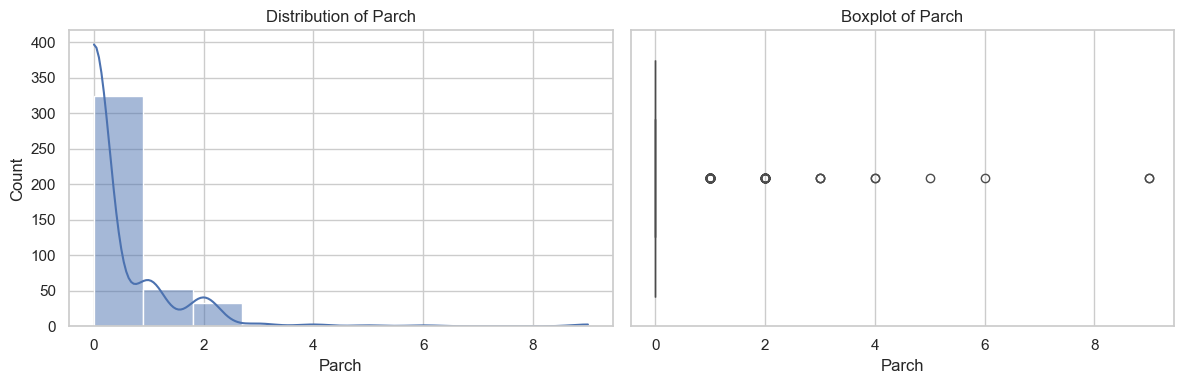

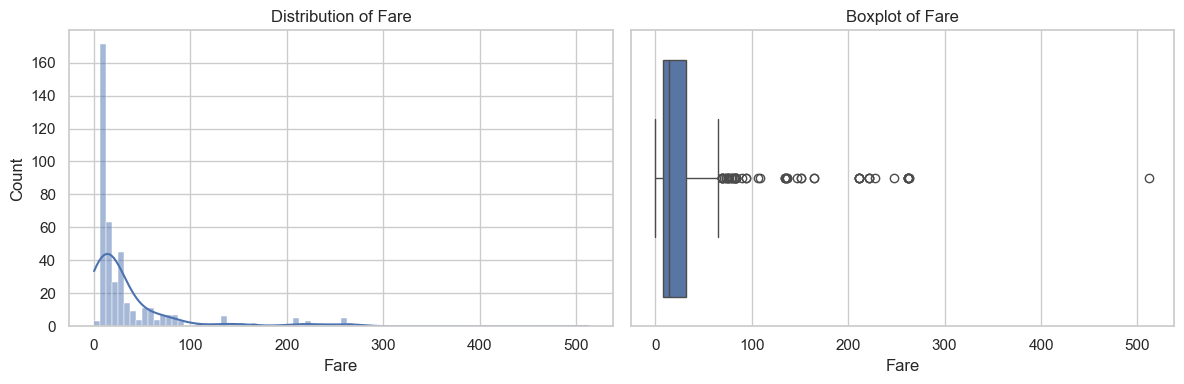

In [6]:
# Histograms and boxplots for numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {col}')

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


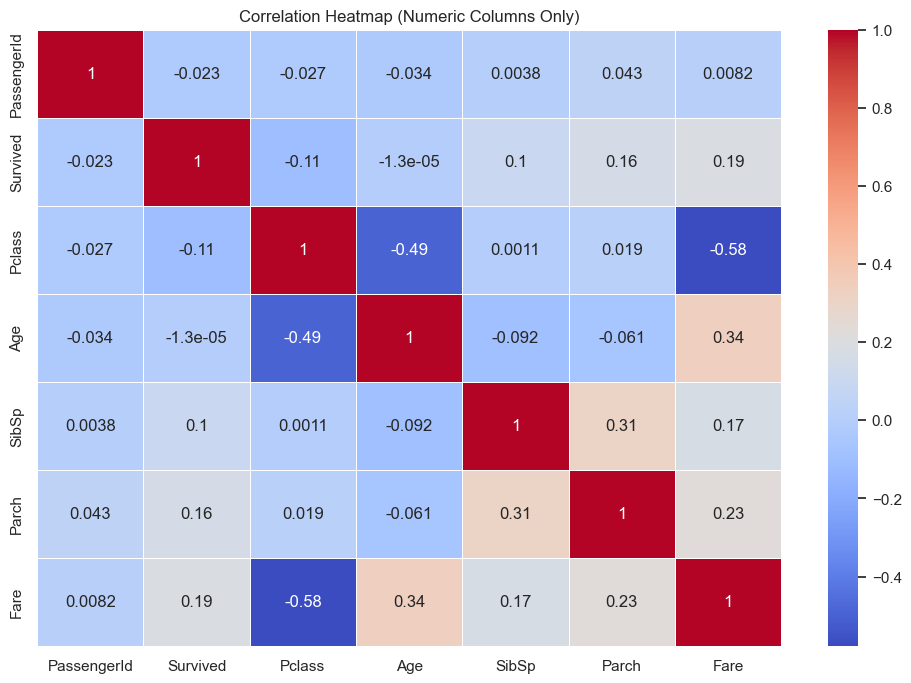

In [7]:
# Step 5: Correlation matrix and heatmap using only numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # filters numeric columns only
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


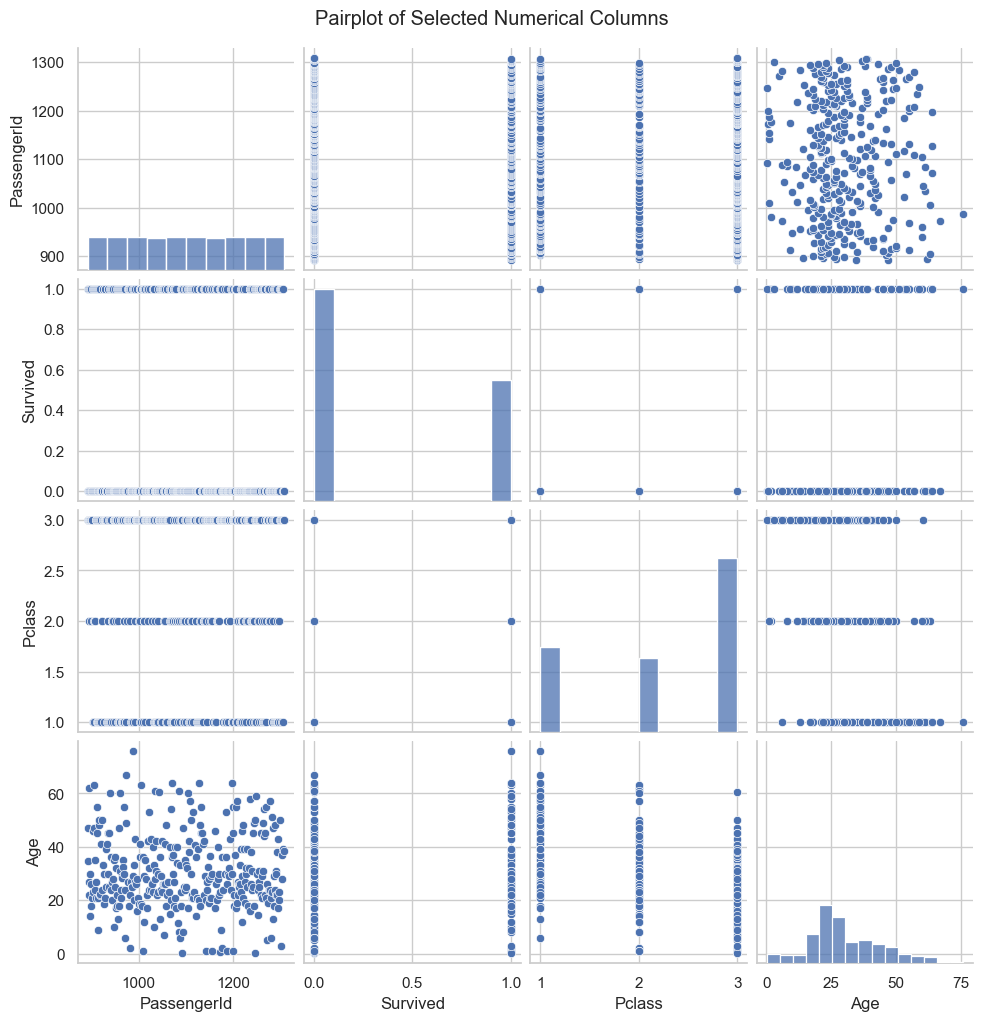

In [8]:
# Adjust the number of columns based on your dataset
selected_cols = numeric_cols[:4]  # Choose first 4 numeric columns
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Numerical Columns", y=1.02)
plt.show()


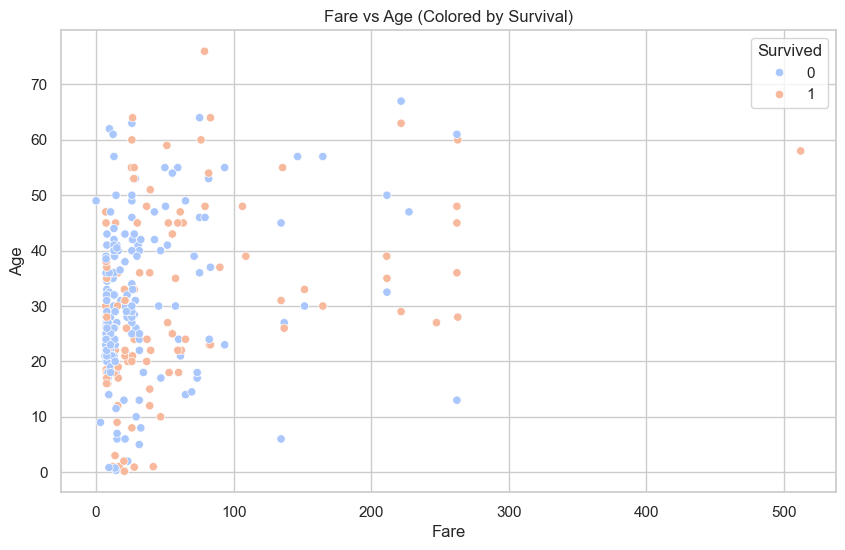

In [9]:
# Ensure plots show up
%matplotlib inline

# Drop rows with missing values in the columns used
plot_data = df[['Fare', 'Age', 'Survived']].dropna()

# Create scatter plot
sns.scatterplot(
    x='Fare',
    y='Age',
    hue='Survived',
    data=plot_data,
    palette='coolwarm'
)
plt.title("Fare vs Age (Colored by Survival)")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()


# 🧾 **EDA Summary Report — Titanic Dataset**

## 📌 Dataset Overview

- **Rows:** 891 passengers
- **Columns:** 12 features including demographic info (age, sex), travel info (fare, ticket class), and target variable (`Survived`).
- **Target Variable:** `Survived` (0 = did not survive, 1 = survived)

---

## 🧠 Key Statistical Insights

### 📋 **Basic Information**
- `Age`, `Cabin`, and `Embarked` have **missing values**.
  - `Cabin` has a **large proportion** of missing values — may need to be dropped or carefully imputed.
  - `Age` can be imputed using mean/median or predicted using regression models.
  
### 📊 **Descriptive Statistics**
- `Fare` has a **wide range** (0 to 512), showing **outliers** — passengers in first class or with group tickets likely paid more.
- `Age` distribution is roughly **normal**, but with some outliers (e.g., very young infants).
- `SibSp` and `Parch` are skewed towards 0, meaning most passengers traveled alone or with just one relative.

---

## 📉 Visual Analysis Insights

### 🔶 **Univariate Analysis**
- **Histogram of Age:** Bell-shaped distribution with a peak between 20–40 years.
- **Boxplot of Fare:** Shows significant **right skew** with a few passengers paying extremely high fares.
- **Survived Value Counts:**
  - About **38% survived**, while **62% did not**, indicating class imbalance for modeling.

---

### 🔷 **Correlation Heatmap**
- Moderate positive correlation between `Pclass` and `Fare` (lower class → cheaper tickets).
- Slight negative correlation between `Pclass` and `Survived` — **higher classes had higher survival rates**.
- No high multicollinearity detected among numeric variables.

---

### 🔷 **Pairplot (selected features)**
- `Age` and `Fare` show some separation by survival status but are not alone strong predictors.
- `Pclass` appears more distinguishable — supports the idea that **passenger class influenced survival**.

---

### 🔷 **Scatter Plot: Fare vs Age (Colored by Survival)**
- High-fare passengers span a range of ages, but **those paying more had a better chance of survival**.
- Younger passengers cluster at lower fares — suggesting **many children were in lower classes**.
- Some elderly passengers also survived, likely due to first-class accommodations.

---

## 🔍 Categorical Insights

- **Sex:**
  - Much higher survival rate among **females** than males.
  - Strong predictor for survival — might be used as a key feature for modeling.

- **Pclass:**
  - First-class passengers had significantly higher survival rates.
  - Third-class passengers had the lowest.

- **Embarked:**
  - Most passengers embarked from **Southampton (S)**.
  - Those who embarked from **Cherbourg (C)** had the highest survival rate (possibly wealthier passengers).

---

## ✅ Summary of Findings

| Feature        | Insight                                                                 |
|----------------|-------------------------------------------------------------------------|
| Age            | Bell-shaped distribution; missing values need imputation                |
| Fare           | Right-skewed with extreme outliers; correlates with Pclass              |
| Survived       | Imbalanced classes (62% did not survive)                                |
| Sex            | Strong influence on survival — females had much higher survival rate    |
| Pclass         | 1st class had better survival; class matters                            |
| Embarked       | Port of embarkation shows trends, e.g., Cherbourg → more survivors      |
| Cabin          | Most values missing — low analytical use without imputation             |

---

## 📈 Suggestions for Next Steps

1. **Handle missing values:**
   - Impute `Age` (mean/median or predictive modeling).
   - Consider dropping or heavily processing `Cabin`.

2. **Feature Engineering:**
   - Extract title from `Name` (e.g., Mr., Mrs., etc.) for additional features.
   - Consider creating new features like family size (SibSp + Parch).

3. **Modeling:**
   - Investigate logistic regression or decision trees for predictive modeling.
   - Use cross-validation to handle imbalanced data (Survived classes).
   - Feature importance from models like Random Forests could help refine which variables matter most for survival prediction.
